**Predicting players rating**

In this project, we are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.The dataset we are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. Download the data in the same folder and run the necessary commands to get it in the environment.

**About the Dataset**

**The ultimate Soccer database for data analysis and machine learning**

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.

1. +25,000 matches
2. +10,000 players
3. 11 European Countries with their lead championship
4. Seasons 2008 to 2016
5. Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
6. Team line up with squad formation (X, Y coordinates)
7. Betting odds from up to 10 providers
8. Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for 
9. +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, we would normally see the same in the dataset.

**Python skills required to complete this project**

**SQL:**

The data is in a SQL database, so we need to retrieve it using structured query language (SQL). We also need to know how to connect to the SQL database with Python. The library we are using for this is 'sqlite3'. SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides a SQL interface compliant with the DB-API 2.0 specification described by PEP 249. We do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards.

To use sqlite3 module, we must first create a connection object that represents the database, and then (optionally) we can create a cursor object, which will help us in executing all the SQL statements.

**Pandas:**

Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields, including academic and commercial domains comprised of finance, economics, statistics, analytics, etc. In this scenario, we will utilize the various features of Python with Pandas.

**Scikit Learn:**

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

The library is built upon the SciPy (Scientific Python) that must be installed before we can use scikit-learn. This stack includes:

1. NumPy: Base n-dimensional array package
2. SciPy: Fundamental library for scientific computing
3. Matplotlib: Comprehensive 2D/3D plotting
4. IPython: Enhanced interactive console
5. Sympy: Symbolic mathematics
6. Pandas: Data structures and analysis

Extensions or modules for SciPy are conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn. 

The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as ease-of-use, code quality, collaboration, documentation and performance.

**Machine Learning skills required to complete this project**

**Supervised learning**

Supervised learning deals with learning a function from available training data. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples.

**Regression**

Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is parametric in nature because it makes certain assumptions (discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results.

**Model evaluation**

We must know how to judge a model on unseen data. What metric to select to judge the performance? **RMSE**

# Import Libraries

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
%matplotlib inline

# Read Data from the Database Into Pandas

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

**DB Schema**

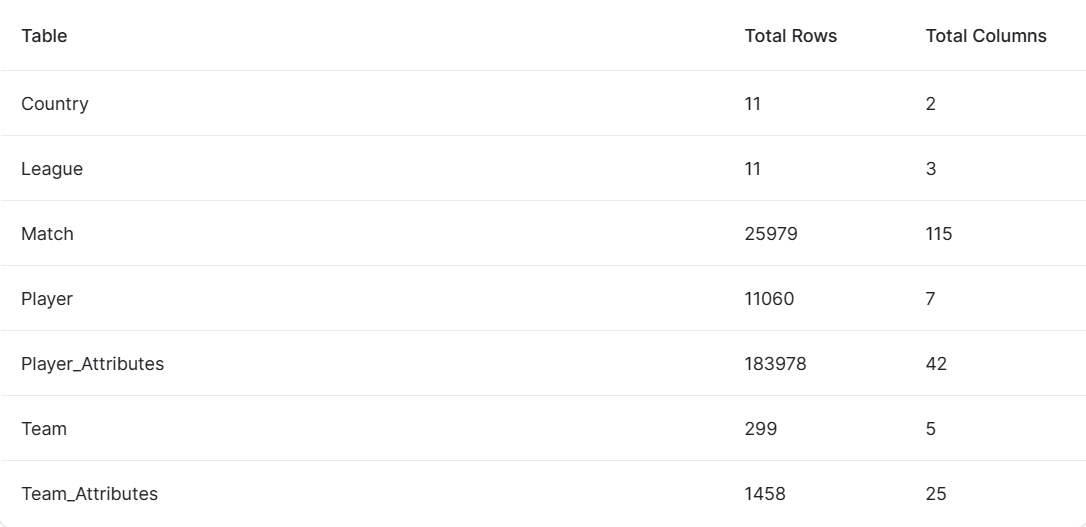

# Data Cleansing

In [5]:
drop_cols = ['id', 'player_fifa_api_id', 'player_api_id', 'date']
df.drop(columns=drop_cols, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       183142 non-null  float64
 1   potential            183142 non-null  float64
 2   preferred_foot       183142 non-null  object 
 3   attacking_work_rate  180748 non-null  object 
 4   defensive_work_rate  183142 non-null  object 
 5   crossing             183142 non-null  float64
 6   finishing            183142 non-null  float64
 7   heading_accuracy     183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  curve                181265 non-null  float64
 12  free_kick_accuracy   183142 non-null  float64
 13  long_passing         183142 non-null  float64
 14  ball_control         183142 non-null  float64
 15  acceleration     

In [6]:
df['preferred_foot'].unique()

array(['right', 'left', None], dtype=object)

In [7]:
df['prefers_right_foot'] = df['preferred_foot'].apply(lambda x: 1 if x == "right" else (0 if x == "left" else None))
df['prefers_right_foot'].unique()

array([ 1.,  0., nan])

In [8]:
df['attacking_work_rate'].unique()
#data appears corrupted (drop col?)

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [9]:
dict_awr = Counter(df['attacking_work_rate'])
dict_awr
# most data in col is not corrupted so will keep and drop corrupted portions

Counter({'medium': 125070,
         'high': 42823,
         None: 3230,
         'low': 8569,
         'None': 3639,
         'le': 104,
         'norm': 348,
         'stoc': 89,
         'y': 106})

In [10]:
df['attacking_work_rate'] = df['attacking_work_rate'].apply(lambda x: x if x in ['medium', 'high', 'low'] else None)
df['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low'], dtype=object)

In [11]:
df['defensive_work_rate'].unique()
#data appears corrupted (drop col?)

array(['medium', 'high', 'low', '_0', None, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

In [12]:
dict_dwr = Counter(df['defensive_work_rate'])
dict_dwr
# most data in col is not corrupted so will keep and drop corrupted portions

Counter({'medium': 130846,
         'high': 27041,
         'low': 18432,
         '_0': 2394,
         None: 836,
         '5': 234,
         'ean': 104,
         'o': 1550,
         '1': 441,
         'ormal': 348,
         '7': 217,
         '2': 342,
         '8': 78,
         '4': 116,
         'tocky': 89,
         '0': 197,
         '3': 258,
         '6': 197,
         '9': 152,
         'es': 106})

In [13]:
df['defensive_work_rate'] = df['defensive_work_rate'].apply(lambda x: x if x in ['medium', 'high', 'low'] else None)
df['defensive_work_rate'].unique()

array(['medium', 'high', 'low', None], dtype=object)

In [14]:
df.isna().sum()

overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    7516
defensive_work_rate    7659
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling             836
gk_kicking          

In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       176161 non-null  float64
 1   potential            176161 non-null  float64
 2   preferred_foot       176161 non-null  object 
 3   attacking_work_rate  176161 non-null  object 
 4   defensive_work_rate  176161 non-null  object 
 5   crossing             176161 non-null  float64
 6   finishing            176161 non-null  float64
 7   heading_accuracy     176161 non-null  float64
 8   short_passing        176161 non-null  float64
 9   volleys              176161 non-null  float64
 10  dribbling            176161 non-null  float64
 11  curve                176161 non-null  float64
 12  free_kick_accuracy   176161 non-null  float64
 13  long_passing         176161 non-null  float64
 14  ball_control         176161 non-null  float64
 15  acceleration     

In [16]:
df.drop('preferred_foot', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   overall_rating       176161 non-null  float64
 1   potential            176161 non-null  float64
 2   attacking_work_rate  176161 non-null  object 
 3   defensive_work_rate  176161 non-null  object 
 4   crossing             176161 non-null  float64
 5   finishing            176161 non-null  float64
 6   heading_accuracy     176161 non-null  float64
 7   short_passing        176161 non-null  float64
 8   volleys              176161 non-null  float64
 9   dribbling            176161 non-null  float64
 10  curve                176161 non-null  float64
 11  free_kick_accuracy   176161 non-null  float64
 12  long_passing         176161 non-null  float64
 13  ball_control         176161 non-null  float64
 14  acceleration         176161 non-null  float64
 15  sprint_speed     

In [17]:
cat_cols = ['attacking_work_rate', 'defensive_work_rate']

In [18]:
df1 = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   overall_rating              176161 non-null  float64
 1   potential                   176161 non-null  float64
 2   crossing                    176161 non-null  float64
 3   finishing                   176161 non-null  float64
 4   heading_accuracy            176161 non-null  float64
 5   short_passing               176161 non-null  float64
 6   volleys                     176161 non-null  float64
 7   dribbling                   176161 non-null  float64
 8   curve                       176161 non-null  float64
 9   free_kick_accuracy          176161 non-null  float64
 10  long_passing                176161 non-null  float64
 11  ball_control                176161 non-null  float64
 12  acceleration                176161 non-null  float64
 13  sprint_speed  

In [19]:
cols = df1.columns.values[1:]
cols

array(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'prefers_right_foot', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'defensive_work_rate_low',
       'defensive_work_rate_medium'], dtype=object)

In [20]:
target = df1['overall_rating']
data = df1[cols]
target, data

(0         67.0
 1         67.0
 2         62.0
 3         61.0
 4         61.0
           ... 
 183973    83.0
 183974    78.0
 183975    77.0
 183976    78.0
 183977    80.0
 Name: overall_rating, Length: 176161, dtype: float64,
         potential  crossing  finishing  heading_accuracy  short_passing  \
 0            71.0      49.0       44.0              71.0           61.0   
 1            71.0      49.0       44.0              71.0           61.0   
 2            66.0      49.0       44.0              71.0           61.0   
 3            65.0      48.0       43.0              70.0           60.0   
 4            65.0      48.0       43.0              70.0           60.0   
 ...           ...       ...        ...               ...            ...   
 183973       85.0      84.0       77.0              59.0           89.0   
 183974       80.0      74.0       76.0              53.0           84.0   
 183975       80.0      74.0       71.0              53.0           84.0   
 183976  

# EDA

In [21]:
corr_ = df1.corr()
corr_

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,prefers_right_foot,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium
overall_rating,1.000000,0.764649,0.357367,0.329919,0.314559,0.458989,0.361970,0.353778,0.357719,0.350082,...,0.025901,0.005906,0.027893,0.007336,0.007223,-0.002039,0.006709,-0.148416,0.064207,-0.151846
potential,0.764649,1.000000,0.277497,0.288138,0.206040,0.383068,0.302105,0.340609,0.296161,0.262549,...,-0.014134,0.004931,0.092286,0.003521,0.004167,-0.004628,-0.035382,-0.119532,0.055235,-0.094671
crossing,0.357367,0.277497,1.000000,0.577221,0.369662,0.791218,0.637125,0.810560,0.789715,0.709652,...,-0.606135,-0.597762,-0.365499,-0.599978,-0.603875,-0.176279,-0.089578,-0.230857,0.111706,-0.124244
finishing,0.329919,0.288138,0.577221,1.000000,0.374881,0.581519,0.852125,0.785389,0.691900,0.634419,...,-0.481511,-0.467262,-0.298350,-0.473272,-0.475749,0.011384,-0.138176,-0.204995,0.290442,-0.178462
heading_accuracy,0.314559,0.206040,0.369662,0.374881,1.000000,0.549571,0.392376,0.401980,0.321210,0.305661,...,-0.665912,-0.650316,-0.410810,-0.650070,-0.653417,-0.004074,0.132384,-0.147384,0.038518,-0.185016
short_passing,0.458989,0.383068,0.791218,0.581519,0.549571,1.000000,0.640506,0.790219,0.732890,0.694275,...,-0.695386,-0.691451,-0.431317,-0.692490,-0.694698,-0.074646,-0.019234,-0.185990,0.090982,-0.185972
volleys,0.361970,0.302105,0.637125,0.852125,0.392376,0.640506,1.000000,0.784067,0.752348,0.683576,...,-0.509384,-0.487552,-0.284736,-0.491780,-0.493829,-0.012453,-0.112179,-0.202474,0.260869,-0.189130
dribbling,0.353778,0.340609,0.810560,0.785389,0.401980,0.790219,0.784067,1.000000,0.811219,0.709262,...,-0.656639,-0.652923,-0.439551,-0.656071,-0.658702,-0.085465,-0.130505,-0.240507,0.218423,-0.168487
curve,0.357719,0.296161,0.789715,0.691900,0.321210,0.732890,0.752348,0.811219,1.000000,0.799801,...,-0.557926,-0.546179,-0.339511,-0.551312,-0.552798,-0.130377,-0.114178,-0.208641,0.195482,-0.138963
free_kick_accuracy,0.350082,0.262549,0.709652,0.634419,0.305661,0.694275,0.683576,0.709262,0.799801,1.000000,...,-0.498985,-0.493018,-0.287744,-0.495863,-0.497063,-0.126147,-0.080680,-0.160767,0.168435,-0.136501


In [22]:
# ranked (absolute value) correlations of independent vars to 'overall_rating' (target var)
df_corr_ranked = abs(corr_['overall_rating']).rank()
df_corr_ranked

overall_rating                40.0
potential                     38.0
crossing                      27.0
finishing                     24.0
heading_accuracy              20.0
short_passing                 37.0
volleys                       29.0
dribbling                     26.0
curve                         28.0
free_kick_accuracy            25.0
long_passing                  35.0
ball_control                  36.0
acceleration                  16.0
sprint_speed                  18.0
agility                       15.0
reactions                     39.0
balance                       13.0
shot_power                    33.0
jumping                       19.0
stamina                       23.0
strength                      21.0
long_shots                    32.0
aggression                    22.0
interceptions                 17.0
positioning                   30.0
vision                        34.0
penalties                     31.0
marking                       10.0
standing_tackle     

In [23]:
rank = df_corr_ranked.values
var = df_corr_ranked.index.values
corr_ranked_and_sorted = sorted([(-(rank[i]-(len(rank) + 1)), var[i]) for i in range(len(rank))])
corr_ranked_and_sorted

[(1.0, 'overall_rating'),
 (2.0, 'reactions'),
 (3.0, 'potential'),
 (4.0, 'short_passing'),
 (5.0, 'ball_control'),
 (6.0, 'long_passing'),
 (7.0, 'vision'),
 (8.0, 'shot_power'),
 (9.0, 'long_shots'),
 (10.0, 'penalties'),
 (11.0, 'positioning'),
 (12.0, 'volleys'),
 (13.0, 'curve'),
 (14.0, 'crossing'),
 (15.0, 'dribbling'),
 (16.0, 'free_kick_accuracy'),
 (17.0, 'finishing'),
 (18.0, 'stamina'),
 (19.0, 'aggression'),
 (20.0, 'strength'),
 (21.0, 'heading_accuracy'),
 (22.0, 'jumping'),
 (23.0, 'sprint_speed'),
 (24.0, 'interceptions'),
 (25.0, 'acceleration'),
 (26.0, 'agility'),
 (27.0, 'standing_tackle'),
 (28.0, 'balance'),
 (29.0, 'defensive_work_rate_medium'),
 (30.0, 'attacking_work_rate_medium'),
 (31.0, 'marking'),
 (32.0, 'sliding_tackle'),
 (33.0, 'defensive_work_rate_low'),
 (34.0, 'gk_kicking'),
 (35.0, 'gk_diving'),
 (36.0, 'gk_positioning'),
 (37.0, 'gk_reflexes'),
 (38.0, 'attacking_work_rate_low'),
 (39.0, 'gk_handling'),
 (40.0, 'prefers_right_foot')]

In [24]:
# top 20
top_20 = corr_ranked_and_sorted[:20]
top_20

[(1.0, 'overall_rating'),
 (2.0, 'reactions'),
 (3.0, 'potential'),
 (4.0, 'short_passing'),
 (5.0, 'ball_control'),
 (6.0, 'long_passing'),
 (7.0, 'vision'),
 (8.0, 'shot_power'),
 (9.0, 'long_shots'),
 (10.0, 'penalties'),
 (11.0, 'positioning'),
 (12.0, 'volleys'),
 (13.0, 'curve'),
 (14.0, 'crossing'),
 (15.0, 'dribbling'),
 (16.0, 'free_kick_accuracy'),
 (17.0, 'finishing'),
 (18.0, 'stamina'),
 (19.0, 'aggression'),
 (20.0, 'strength')]

In [25]:
top_20_corr = [top_20[i][1] for i in range(len(top_20))]
top_20_corr

['overall_rating',
 'reactions',
 'potential',
 'short_passing',
 'ball_control',
 'long_passing',
 'vision',
 'shot_power',
 'long_shots',
 'penalties',
 'positioning',
 'volleys',
 'curve',
 'crossing',
 'dribbling',
 'free_kick_accuracy',
 'finishing',
 'stamina',
 'aggression',
 'strength']

In [26]:
corr_top_20 = df1[top_20_corr].corr()
corr_top_20

,overall_rating,reactions,potential,short_passing,ball_control,long_passing,vision,shot_power,long_shots,penalties,positioning,volleys,curve,crossing,dribbling,free_kick_accuracy,finishing,stamina,aggression,strength
overall_rating,1.000000,0.774539,0.764649,0.458989,0.444013,0.434606,0.431398,0.428504,0.392907,0.392408,0.368574,0.361970,0.357719,0.357367,0.353778,0.350082,0.329919,0.324152,0.322973,0.315579
reactions,0.774539,1.000000,0.582092,0.460433,0.447774,0.402574,0.452408,0.423885,0.413709,0.389390,0.409982,0.397158,0.391901,0.383719,0.376466,0.368762,0.354267,0.354962,0.331279,0.235032
potential,0.764649,0.582092,1.000000,0.383068,0.401982,0.342968,0.379519,0.325417,0.313093,0.314667,0.326779,0.302105,0.296161,0.277497,0.340609,0.262549,0.288138,0.258333,0.160202,0.119867
short_passing,0.458989,0.460433,0.383068,1.000000,0.891375,0.805025,0.767825,0.723692,0.730636,0.613208,0.680301,0.640506,0.732890,0.791218,0.790219,0.694275,0.581519,0.612405,0.456245,0.089562
ball_control,0.444013,0.447774,0.401982,0.891375,1.000000,0.677610,0.774896,0.776359,0.794297,0.685799,0.782462,0.749951,0.799573,0.808383,0.903069,0.721736,0.721884,0.606671,0.368353,0.026280
long_passing,0.434606,0.402574,0.342968,0.805025,0.677610,1.000000,0.672189,0.544014,0.578068,0.476993,0.483194,0.415401,0.588153,0.687931,0.581698,0.605400,0.342564,0.532422,0.459506,0.065404
vision,0.431398,0.452408,0.379519,0.767825,0.774896,0.672189,1.000000,0.648940,0.732043,0.666163,0.741735,0.692330,0.729916,0.695817,0.736604,0.699831,0.654286,0.506815,0.274892,-0.041885
shot_power,0.428504,0.423885,0.325417,0.723692,0.776359,0.544014,0.648940,1.000000,0.839391,0.682513,0.709566,0.747560,0.696818,0.658405,0.746288,0.685254,0.728581,0.516510,0.368609,0.175521
long_shots,0.392907,0.413709,0.313093,0.730636,0.794297,0.578068,0.732043,0.839391,1.000000,0.716380,0.774724,0.815743,0.785196,0.717051,0.808026,0.774134,0.807804,0.477997,0.237266,0.000288
penalties,0.392408,0.389390,0.314667,0.613208,0.685799,0.476993,0.666163,0.682513,0.716380,1.000000,0.754793,0.715863,0.651492,0.574606,0.665066,0.670293,0.728901,0.398506,0.216562,0.056071


In [27]:
# mask for corr mat
upper_half_mask = np.triu(corr_top_20)

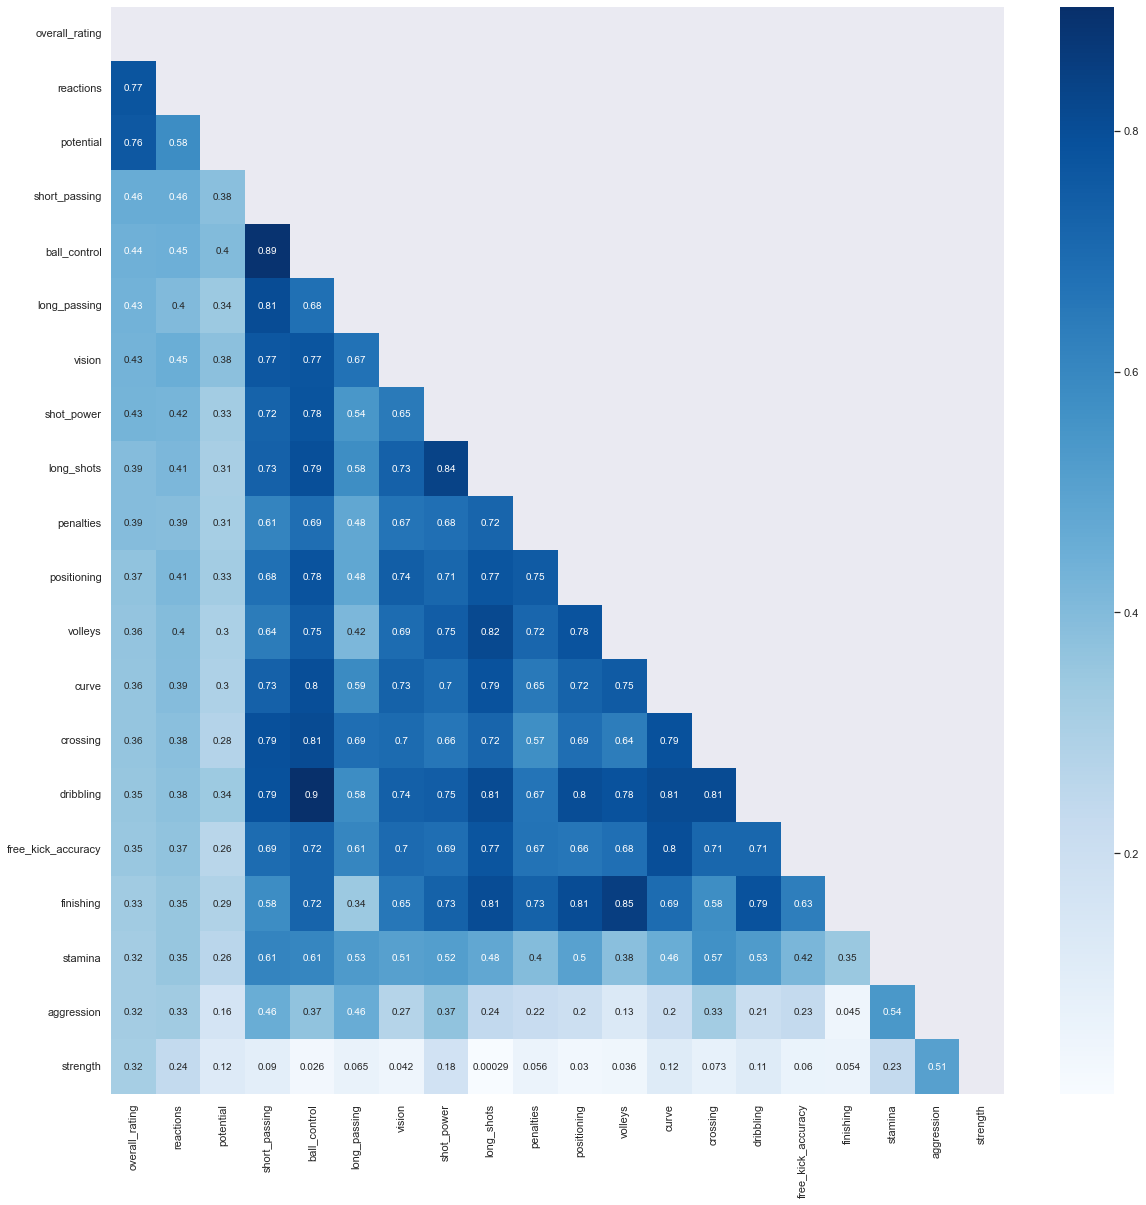

In [28]:
# absolute value of corr (for ranking purposes)
plt.figure(figsize=(20, 20))
sns.heatmap(abs(corr_top_20), annot=True, cmap="Blues", fmt='.2g', mask=upper_half_mask)
plt.show()
#multicollinearity across many independent vars (keep this in mind when training the linear regressive model)

# Data Preparation (Feature Selection)

In [29]:
# no reduction in dimensionality needed for DT modeling
# no scaling necessary for DT regressor or linear regression modeling
target, data

(0         67.0
 1         67.0
 2         62.0
 3         61.0
 4         61.0
           ... 
 183973    83.0
 183974    78.0
 183975    77.0
 183976    78.0
 183977    80.0
 Name: overall_rating, Length: 176161, dtype: float64,
         potential  crossing  finishing  heading_accuracy  short_passing  \
 0            71.0      49.0       44.0              71.0           61.0   
 1            71.0      49.0       44.0              71.0           61.0   
 2            66.0      49.0       44.0              71.0           61.0   
 3            65.0      48.0       43.0              70.0           60.0   
 4            65.0      48.0       43.0              70.0           60.0   
 ...           ...       ...        ...               ...            ...   
 183973       85.0      84.0       77.0              59.0           89.0   
 183974       80.0      74.0       76.0              53.0           84.0   
 183975       80.0      74.0       71.0              53.0           84.0   
 183976  

## Train-test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state= 355)
X_train, y_train, X_test, y_test

(        potential  crossing  finishing  heading_accuracy  short_passing  \
 95789        71.0      28.0       19.0              53.0           34.0   
 146964       68.0      63.0       44.0              51.0           56.0   
 67531        72.0      72.0       71.0              76.0           73.0   
 78279        72.0      72.0       54.0              51.0           64.0   
 129745       81.0      61.0       78.0              74.0           65.0   
 ...           ...       ...        ...               ...            ...   
 164722       69.0      63.0       55.0              49.0           79.0   
 76046        65.0      58.0       50.0              58.0           61.0   
 25004        64.0      44.0       38.0              55.0           68.0   
 156738       76.0      59.0       71.0              74.0           72.0   
 126770       68.0      67.0       66.0              65.0           70.0   
 
         volleys  dribbling  curve  free_kick_accuracy  long_passing  ...  \
 95789   

## VIF (for linear regressive modeling only)

In [31]:
corr_ranked_and_sorted

[(1.0, 'overall_rating'),
 (2.0, 'reactions'),
 (3.0, 'potential'),
 (4.0, 'short_passing'),
 (5.0, 'ball_control'),
 (6.0, 'long_passing'),
 (7.0, 'vision'),
 (8.0, 'shot_power'),
 (9.0, 'long_shots'),
 (10.0, 'penalties'),
 (11.0, 'positioning'),
 (12.0, 'volleys'),
 (13.0, 'curve'),
 (14.0, 'crossing'),
 (15.0, 'dribbling'),
 (16.0, 'free_kick_accuracy'),
 (17.0, 'finishing'),
 (18.0, 'stamina'),
 (19.0, 'aggression'),
 (20.0, 'strength'),
 (21.0, 'heading_accuracy'),
 (22.0, 'jumping'),
 (23.0, 'sprint_speed'),
 (24.0, 'interceptions'),
 (25.0, 'acceleration'),
 (26.0, 'agility'),
 (27.0, 'standing_tackle'),
 (28.0, 'balance'),
 (29.0, 'defensive_work_rate_medium'),
 (30.0, 'attacking_work_rate_medium'),
 (31.0, 'marking'),
 (32.0, 'sliding_tackle'),
 (33.0, 'defensive_work_rate_low'),
 (34.0, 'gk_kicking'),
 (35.0, 'gk_diving'),
 (36.0, 'gk_positioning'),
 (37.0, 'gk_reflexes'),
 (38.0, 'attacking_work_rate_low'),
 (39.0, 'gk_handling'),
 (40.0, 'prefers_right_foot')]

In [32]:
def remove_explanatory_vars_with_vif(data, sorted_ranks):
    cols = [rank[1] for rank in list(reversed(sorted_ranks))]
    print(cols)
    while True:
        vif = pd.DataFrame()
        vif["vif"] = [variance_inflation_factor(data[cols], i) for i in range(data[cols].shape[1])]
        vif["Features"] = cols
        print(vif)
        i = 0
        while i < len(cols):
            print(i)
            col = cols[i]
            vif_col = vif[vif['Features'] == col]['vif'].values[0]
            if vif_col > 10:
                cols = cols[:i] + cols[i+1:]
                print(f'Removing {col} with VIF of {vif_col}.')
                break
            else:
                if i == len(cols) - 1:
                    return vif
                i += 1

In [33]:
vif = remove_explanatory_vars_with_vif(data, corr_ranked_and_sorted[1:])

['prefers_right_foot', 'gk_handling', 'attacking_work_rate_low', 'gk_reflexes', 'gk_positioning', 'gk_diving', 'gk_kicking', 'defensive_work_rate_low', 'sliding_tackle', 'marking', 'attacking_work_rate_medium', 'defensive_work_rate_medium', 'balance', 'standing_tackle', 'agility', 'acceleration', 'interceptions', 'sprint_speed', 'jumping', 'heading_accuracy', 'strength', 'aggression', 'stamina', 'finishing', 'free_kick_accuracy', 'dribbling', 'crossing', 'curve', 'volleys', 'positioning', 'penalties', 'long_shots', 'shot_power', 'vision', 'long_passing', 'ball_control', 'short_passing', 'potential', 'reactions']
           vif                    Features
0     4.355979          prefers_right_foot
1    42.907415                 gk_handling
2     1.385059     attacking_work_rate_low
3    45.662328                 gk_reflexes
4    43.232882              gk_positioning
5    25.283300                   gk_diving
6     7.831464                  gk_kicking
7     2.069884     defensive_work_ra

           vif                    Features
0     4.349264          prefers_right_foot
1     1.376811     attacking_work_rate_low
2     3.798679                  gk_kicking
3     2.064455     defensive_work_rate_low
4    70.541371                     marking
5     4.383555  attacking_work_rate_medium
6     6.279216  defensive_work_rate_medium
7    60.171938                     balance
8    85.517272             standing_tackle
9   105.921869                     agility
10  210.878142                acceleration
11   38.633551               interceptions
12  189.639524                sprint_speed
13   54.684589                     jumping
14   45.876222            heading_accuracy
15   66.315516                    strength
16   43.852631                  aggression
17   72.916545                     stamina
18   56.408683                   finishing
19   32.629595          free_kick_accuracy
20  123.055912                   dribbling
21   55.341006                    crossing
22   47.279

           vif                    Features
0     4.329562          prefers_right_foot
1     1.362782     attacking_work_rate_low
2     3.495767                  gk_kicking
3     2.001792     defensive_work_rate_low
4     4.347821  attacking_work_rate_medium
5     6.174702  defensive_work_rate_medium
6    77.476313                sprint_speed
7    46.542407                     jumping
8    37.140414            heading_accuracy
9    59.820595                    strength
10   38.878593                  aggression
11   68.184773                     stamina
12   50.279429                   finishing
13   32.491753          free_kick_accuracy
14  119.208214                   dribbling
15   53.750014                    crossing
16   46.902669                       curve
17   43.416746                     volleys
18   49.792290                 positioning
19   42.284989                   penalties
20   62.500388                  long_shots
21   73.752683                  shot_power
22   62.167

           vif                    Features
0     4.281041          prefers_right_foot
1     1.317322     attacking_work_rate_low
2     3.351115                  gk_kicking
3     1.866558     defensive_work_rate_low
4     4.239705  attacking_work_rate_medium
5     5.926242  defensive_work_rate_medium
6    31.902753          free_kick_accuracy
7   100.433666                   dribbling
8    50.079296                    crossing
9    46.076961                       curve
10   37.768338                     volleys
11   46.009774                 positioning
12   39.939988                   penalties
13   57.772194                  long_shots
14   65.511316                  shot_power
15   59.563662                      vision
16   61.107747                long_passing
17  216.285428                ball_control
18  168.078148               short_passing
19  130.336893                   potential
20   94.972201                   reactions
0
1
2
3
4
5
6
Removing free_kick_accuracy with VIF of 

          vif                    Features
0    4.048427          prefers_right_foot
1    1.221502     attacking_work_rate_low
2    2.878228                  gk_kicking
3    1.748981     defensive_work_rate_low
4    4.002657  attacking_work_rate_medium
5    5.770481  defensive_work_rate_medium
6  108.655941                ball_control
7  106.794215               short_passing
8  118.409619                   potential
9   90.394563                   reactions
0
1
2
3
4
5
6
Removing ball_control with VIF of 108.65594144952429.
          vif                    Features
0    4.045838          prefers_right_foot
1    1.197622     attacking_work_rate_low
2    2.657960                  gk_kicking
3    1.667867     defensive_work_rate_low
4    3.872762  attacking_work_rate_medium
5    5.741627  defensive_work_rate_medium
6   36.341822               short_passing
7  114.004227                   potential
8   90.280350                   reactions
0
1
2
3
4
5
6
Removing short_passing with VIF of 3

In [34]:
vif

,vif,Features
0,3.962475,prefers_right_foot
1,1.178618,attacking_work_rate_low
2,1.981982,gk_kicking
3,1.612562,defensive_work_rate_low
4,3.739330,attacking_work_rate_medium
5,5.295157,defensive_work_rate_medium
6,9.421897,reactions


# Modeling (Linear Regression) - Baseline

## OLS

In [35]:
vif

,vif,Features
0,3.962475,prefers_right_foot
1,1.178618,attacking_work_rate_low
2,1.981982,gk_kicking
3,1.612562,defensive_work_rate_low
4,3.739330,attacking_work_rate_medium
5,5.295157,defensive_work_rate_medium
6,9.421897,reactions


In [36]:
cols1 = list(vif['Features'])
cols1

['prefers_right_foot',
 'attacking_work_rate_low',
 'gk_kicking',
 'defensive_work_rate_low',
 'attacking_work_rate_medium',
 'defensive_work_rate_medium',
 'reactions']

In [37]:
string_reg1 = 'overall_rating ~ '
for col in cols1:
    string_reg1 += col + ' + '
string_reg1 = string_reg1[:-3]

In [38]:
string_reg1

'overall_rating ~ prefers_right_foot + attacking_work_rate_low + gk_kicking + defensive_work_rate_low + attacking_work_rate_medium + defensive_work_rate_medium + reactions'

In [39]:
X_and_y_train = pd.concat([X_train, y_train], axis=1)
X_and_y_train

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,prefers_right_foot,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_low,defensive_work_rate_medium,overall_rating
95789,71.0,28.0,19.0,53.0,34.0,28.0,40.0,31.0,28.0,35.0,...,7.0,7.0,14.0,14.0,1.0,0,1,0,1,57.0
146964,68.0,63.0,44.0,51.0,56.0,45.0,62.0,56.0,56.0,51.0,...,14.0,9.0,12.0,14.0,1.0,0,0,0,1,65.0
67531,72.0,72.0,71.0,76.0,73.0,68.0,69.0,64.0,64.0,69.0,...,13.0,14.0,11.0,9.0,1.0,0,0,0,0,72.0
78279,72.0,72.0,54.0,51.0,64.0,48.0,68.0,66.0,51.0,58.0,...,7.0,6.0,11.0,15.0,1.0,0,1,1,0,71.0
129745,81.0,61.0,78.0,74.0,65.0,67.0,73.0,55.0,36.0,53.0,...,15.0,7.0,6.0,5.0,1.0,0,1,1,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164722,69.0,63.0,55.0,49.0,79.0,63.0,71.0,72.0,66.0,73.0,...,8.0,7.0,15.0,12.0,1.0,0,1,0,1,69.0
76046,65.0,58.0,50.0,58.0,61.0,48.0,54.0,55.0,61.0,57.0,...,12.0,15.0,15.0,9.0,1.0,1,0,0,1,57.0
25004,64.0,44.0,38.0,55.0,68.0,43.0,58.0,46.0,45.0,64.0,...,9.0,13.0,14.0,9.0,1.0,0,1,0,1,57.0
156738,76.0,59.0,71.0,74.0,72.0,74.0,76.0,66.0,62.0,48.0,...,8.0,6.0,12.0,15.0,1.0,0,1,0,1,72.0


In [40]:
#due to lack of summary method with sklearn, will use ols() from statsmodels library
reg1 = ols(string_reg1, data=X_and_y_train).fit()
reg1.summary()
#remove "defensive_work_rate_low" (highest statistical insignificance as an independent var)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 2.916e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:03:22   Log-Likelihood:            -3.8335e+05
No. Observations:              132120   AIC:                         7.667e+05
Df Residuals:                  132112   BIC:                         7.668e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     30.2628      0.106    285.397      0.000      30.055      30.471
prefers_right_foot            -0.1869      0.028     -6.607      0.000      -0.242      -0.131
attacking_work_rate_low        0.5356      0.061      8.777      0.000       0.416       0.655
gk_kicking                     0.0213      0.001     36.193      0.000       0.020       0.022
defensive_work_rate_low        0.0094      0.049      0.192      0.848      -0.086       0.105
attacking_work_rate_medium    -0.4686      0.029    -16.025      0.000      -0.526      -0.411
defensive_work_rate_medium    -0.7483      0.035    -21.468      0.000      -0.817      -0.680
reactions                      0.5891      0.001    433.645      0.000       0.586       0.592
==============================================================================
Omnibus:                     8326.903   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30868.693
Skew:                          -0.231   Prob(JB):                         0.00
Kurtosis:                       5.323   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
idx2 = np.where(np.array(cols1) == 'defensive_work_rate_low')
idx2

(array([3], dtype=int64),)

In [42]:
string_reg2 = 'overall_rating ~ '
cols2 = list(cols1)[:3] + list(cols1)[4:]
for col in cols2:
    string_reg2 += col + ' + '
string_reg2 = string_reg2[:-3]

In [43]:
string_reg2

'overall_rating ~ prefers_right_foot + attacking_work_rate_low + gk_kicking + attacking_work_rate_medium + defensive_work_rate_medium + reactions'

In [44]:
reg2 = ols(string_reg2, data=X_and_y_train).fit()
reg2.summary()
# all independent vars are statistically significant (all multicollinearity removed)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 3.402e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:03:22   Log-Likelihood:            -3.8335e+05
No. Observations:              132120   AIC:                         7.667e+05
Df Residuals:                  132113   BIC:                         7.668e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     30.2675      0.103    293.325      0.000      30.065      30.470
prefers_right_foot            -0.1870      0.028     -6.613      0.000      -0.242      -0.132
attacking_work_rate_low        0.5344      0.061      8.801      0.000       0.415       0.653
gk_kicking                     0.0213      0.001     36.193      0.000       0.020       0.022
attacking_work_rate_medium    -0.4686      0.029    -16.025      0.000      -0.526      -0.411
defensive_work_rate_medium    -0.7521      0.028    -26.557      0.000      -0.808      -0.697
reactions                      0.5891      0.001    433.968      0.000       0.586       0.592
==============================================================================
Omnibus:                     8326.361   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30864.489
Skew:                          -0.231   Prob(JB):                         0.00
Kurtosis:                       5.322   Cond. No.                         608.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Sklearn

In [45]:
cols2

['prefers_right_foot',
 'attacking_work_rate_low',
 'gk_kicking',
 'attacking_work_rate_medium',
 'defensive_work_rate_medium',
 'reactions']

In [46]:
soccer_x_train = X_train[cols2]
soccer_x_train

,prefers_right_foot,attacking_work_rate_low,gk_kicking,attacking_work_rate_medium,defensive_work_rate_medium,reactions
95789,1.0,0,7.0,1,1,48.0
146964,1.0,0,9.0,0,1,66.0
67531,1.0,0,14.0,0,0,74.0
78279,1.0,0,6.0,1,0,71.0
129745,1.0,0,7.0,1,0,71.0
...,...,...,...,...,...,...
164722,1.0,0,7.0,1,1,67.0
76046,1.0,1,15.0,0,1,57.0
25004,1.0,0,13.0,1,1,62.0
156738,1.0,0,6.0,1,1,71.0


In [47]:
y_train

95789     57.0
146964    65.0
67531     72.0
78279     71.0
129745    74.0
          ... 
164722    69.0
76046     57.0
25004     57.0
156738    72.0
126770    68.0
Name: overall_rating, Length: 132120, dtype: float64

In [48]:
#generate linear regression model with sklearn
reg = LinearRegression()

In [49]:
# fit model to train data
reg.fit(soccer_x_train, y_train)

LinearRegression()

In [50]:
# overfit? not at all...
reg.score(soccer_x_train, y_train)

0.607071107767835

In [51]:
soccer_x_test = X_test[cols2]

In [52]:
reg.score(soccer_x_test, y_test)

0.6063986937490701

In [53]:
reg_cv_scores_test = cross_val_score(reg, soccer_x_test, y_test, cv=5)
reg_cv_scores_test

array([0.61199667, 0.60303226, 0.6183922 , 0.59073017, 0.60754202])

In [54]:
avg_reg_cv_score_test = sum(reg_cv_scores_test) / len(reg_cv_scores_test)
avg_reg_cv_score_test

0.6063386660501937

In [55]:
reg_cv_scores_train = cross_val_score(reg, soccer_x_train, y_train, cv=5)
reg_cv_scores_train

array([0.60808555, 0.60443642, 0.60775586, 0.61090964, 0.60379304])

In [56]:
avg_reg_cv_score_train = sum(reg_cv_scores_train) / len(reg_cv_scores_train)
avg_reg_cv_score_train

0.6069961004007514

In [57]:
y_pred_reg = reg.predict(soccer_x_test)

In [58]:
# main metric (RMSE on testing data)
mse_reg = mean_squared_error(y_pred_reg, y_test)
rmse_reg = sqrt(mse_reg)
rmse_reg

4.401138628420744

# Modeling (DT Regressor)

In [59]:
dt1 = DecisionTreeRegressor(random_state=6)

In [60]:
dt1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=6)

## Metrics

In [61]:
dt1.score(X_test, y_test)

0.9598820667633905

In [62]:
# overfit? --> very overfit...not generalized (however, very accurate with test data)
dt1.score(X_train, y_train)

0.9994419175603474

In [63]:
cv_scores_test = cross_val_score(dt1, X_test, y_test, cv=5)
cv_scores_test

array([0.91106731, 0.91143923, 0.90921129, 0.91622776, 0.9088153 ])

In [64]:
avg_cv_score_test = sum(cv_scores_test) / len(cv_scores_test)
avg_cv_score_test

0.9113521769745377

In [65]:
cv_scores_train = cross_val_score(dt1, X_train, y_train, cv=5)
cv_scores_train

array([0.95393642, 0.95548701, 0.95414159, 0.95614394, 0.9547116 ])

In [66]:
# when cross-validated, not as overfit
avg_cv_score_train = sum(cv_scores_train) / len(cv_scores_train)
avg_cv_score_train

0.9548841134057847

## Grid Search (not needed, omit)

In [67]:
# tuning hyperparameters
# grid_param = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth' : range(2,20,1),
#     'min_samples_leaf' : range(1,10,1),
#     'min_samples_split': range(2,10,1),
#     'max_features' : ['auto','log2']
# }
# grid_param

In [68]:
# grid_search = GridSearchCV(estimator=dt1, param_grid=grid_param, cv=5, n_jobs=-1, verbose = 3)

In [69]:
# grid_search.fit(X_train, y_train)

In [70]:
#let's see the best parameters as per our grid search
# grid_search.best_params_

In [71]:
# dt2 = DecisionTreeClassifier(criterion= '', max_depth = , 
#                              max_features = '', min_samples_leaf = , 
#                              min_samples_split= , random_state=6)

In [72]:
# dt2.fit(X_train, y_train)

In [73]:
# dt2.score(X_test, y_test)

In [74]:
# overfit?
# dt2.score(X_train, y_train)

In [75]:
# cv_scores_test2 = cross_val_score(dt2, X_test, y_test, cv=5)
# cv_scores_test2

In [76]:
# avg_cv_score_test2 = sum(cv_scores_test2) / len(cv_scores_test2)
# avg_cv_score_test2

In [77]:
# cv_scores_train2 = cross_val_score(dt2, X_train, y_train, cv=5)
# cv_scores_train2

In [78]:
# avg_cv_score_train2 = sum(cv_scores_train2) / len(cv_scores_train2)
# avg_cv_score_train2

In [80]:
# plt.figure(figsize=(15,10))
# plot_tree(dt1, filled=True)
# plt.show()

In [81]:
y_pred_dt = dt1.predict(X_test)

In [82]:
# main metric (RMSE on testing data)
mse_dt = mean_squared_error(y_pred_dt, y_test)
rmse_dt = sqrt(mse_dt)
rmse_dt

1.4050961973353786

In [83]:
print(f"RMSE of linear regression model is {rmse_reg}; RMSE of decision tree model is {rmse_dt}.")

RMSE of linear regression model is 4.401138628420744; RMSE of decision tree model is 1.4050961973353786.


In [84]:
#best-performing model is Decision Tree-based model by a wide margin (despite overfitting the train data, it performs well on test data)

# Save Model

In [85]:
# save model
with open('dt_soccer_rating_model.pkl', 'wb') as f:
    pickle.dump(dt1, f)